# Determinación distancia entre dos bases de datos

## 0. Se cargan las bibliotecas

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

## 1. Se leen los datos y se definen los parametros relevantes

In [12]:
# Datos de AMB
data_AMB = pd.read_excel("datos_procesados_local_amb.xlsx")

# Datos de los sensores low cost
data_LOW_COST = pd.read_excel("datos_procesados_local_low_cost.xlsx")

In [3]:
data_AMB

,Time,AMB
0,2018-10-01 00:00:00,6.4
1,2018-10-01 01:00:00,6.4
2,2018-10-01 02:00:00,6.7
3,2018-10-01 03:00:00,6.0
4,2018-10-01 04:00:00,7.3
...,...,...
7081,2019-08-31 19:00:00,20.4
7082,2019-08-31 20:00:00,18.7
7083,2019-08-31 21:00:00,22.8
7084,2019-08-31 22:00:00,25.2


In [5]:
data_LOW_COST

,Time,Low-cost
0,2019-04-11 17:29:20.949,23.500000
1,2019-04-11 18:02:49.625,22.083334
2,2019-04-11 19:02:50.638,25.250000
3,2019-04-11 20:03:00.961,28.749998
4,2019-04-11 21:02:49.634,29.000000
...,...,...
3342,2019-09-01 00:02:50.912,6.166667
3343,2019-09-01 01:02:49.911,7.833333
3344,2019-09-01 02:02:49.912,5.416667
3345,2019-09-01 03:02:49.912,5.750000


In [13]:
# Se convierten las fechas a formato datetime

data_AMB['Time']      = pd.to_datetime(data_AMB['Time'])
data_LOW_COST['Time'] = pd.to_datetime(data_LOW_COST['Time'])

# Se eliminan las filas con ceros en los archivos
data_AMB      = data_AMB.dropna()
data_LOW_COST = data_LOW_COST.dropna()

In [130]:
# Parametros del código

## Intervalos inferior y superior del tiempo de AMB y low-cost
a1 = data_AMB['Time'][0]
b1 = data_AMB['Time'][M-1]

a2 = data_LOW_COST['Time'][0]
b2 = data_LOW_COST['Time'][N-1]

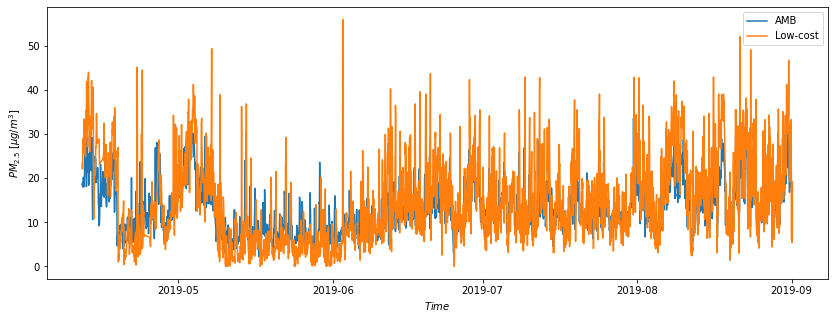

In [110]:
data_AMB = data_AMB.dropna()
plt.figure(figsize=(14,5))
plt.plot(data_AMB['Time'],data_AMB['AMB'], label='AMB')
plt.plot(data_LOW_COST['Time'],data_LOW_COST['Low-cost'], label='Low-cost')
plt.xlabel(r'$Time$')
plt.ylabel(r'$PM_{2.5} \ [\mu g/m^3]$')
plt.legend()

## 2. Funciones y rutinas

In [151]:
def fun(Eps=2, l=4):

    # Longitud ventana
    l = datetime.timedelta(hours=l)

    # Largo del paso
    Eps = datetime.timedelta(hours=Eps)
    
    # Valor maximo de ciclos antes de que la ventana sobrepase el dominio de los datos
    Dominio = int((b2-a2-l)/Eps)

    Errores = []    # Lista que contendrá los errores entre promedios de low-cost y AMB
    Promedios = []  # Lista que contendrá los datos promedios de low-cost y AMB por ventana
    
    for i in range(Dominio):

        window = [a2+Eps*i, a2+Eps*i+l]
        punto_medio = a2+Eps*i+l/2

        Indices1 = abs(data_AMB['Time']-punto_medio) <= l/2 
        Indices2 = abs(data_LOW_COST['Time']-punto_medio) <= l/2

        List1 = data_AMB[Indices1]
        List2 = data_LOW_COST[Indices2]

        mean1 = float(List1.mean())
        mean2 = float(List2.mean())

        error = abs(mean1-mean2)

        Errores.append(error)
        Promedios.append([mean1, mean2])

        if i % int(Dominio/5) < 1 and i>0:
            print('%2.1f'%(i/Dominio*100),'%')
    print('Finish!')
    Errores_new = [Errores[i] for i in range(len(Errores)) if not pd.isnull(Errores[i])]

    sumaq = np.sum(np.array(Errores_new)**2)
    DISTANCIA = np.sqrt(sumaq)
    return DISTANCIA, Promedios

C:\Users\USUARIO\AppData\Local\Temp/ipykernel_15932/2669289905.py:26: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean1 = float(List1.mean())
C:\Users\USUARIO\AppData\Local\Temp/ipykernel_15932/2669289905.py:27: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean2 = float(List2.mean())


20.0 %
40.0 %
60.0 %
80.0 %
100.0 %
Finish
20.0 %
40.0 %
59.9 %
79.9 %
99.9 %
Finish
20.0 %
40.0 %
59.9 %
79.9 %
99.9 %
Finish
20.0 %
39.9 %
59.9 %
79.8 %
99.8 %
Finish


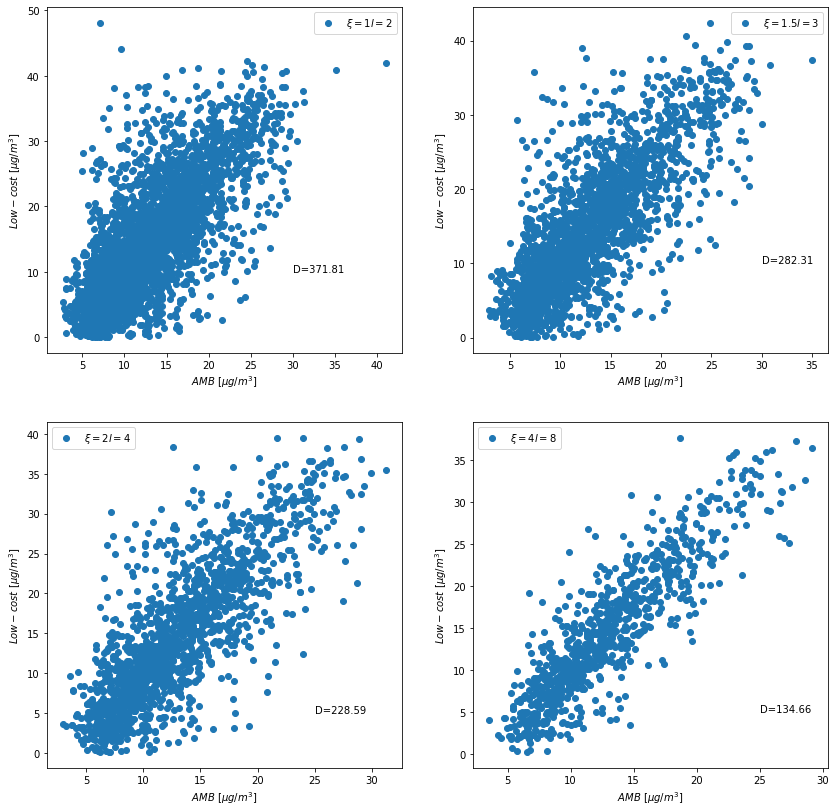

In [149]:
plt.figure(figsize=(14,14))
plt.subplot(221)
D, Promedio = fun(1,2)
Promedio = np.transpose(Promedio)
plt.scatter(Promedio[0],Promedio[1], label=r'$\xi=1 \ \ l=2$')
plt.xlabel(r'$AMB \ [\mu g/m^3]$')
plt.ylabel(r'$Low-cost \ [\mu g/m^3]$')
plt.legend()
plt.text(30,10,'D=%.2f'%(D))
plt.subplot(222)
D, Promedio = fun(1.5,3)
Promedio = np.transpose(Promedio)
plt.scatter(Promedio[0],Promedio[1], label=r'$\xi=1.5  \ \ l=3$')
plt.xlabel(r'$AMB \ [\mu g/m^3]$')
plt.ylabel(r'$Low-cost \ [\mu g/m^3]$')
plt.text(30,10,'D=%.2f'%(D))
plt.legend()
plt.subplot(223)
D, Promedio = fun(2,4)
Promedio = np.transpose(Promedio)
plt.scatter(Promedio[0],Promedio[1], label=r'$\xi=2  \ \ l=4$')
plt.xlabel(r'$AMB \ [\mu g/m^3]$')
plt.ylabel(r'$Low-cost \ [\mu g/m^3]$')
plt.text(25,5,'D=%.2f'%(D))
plt.legend()
plt.subplot(224)
D, Promedio = fun(4,8)
Promedio = np.transpose(Promedio)
plt.scatter(Promedio[0],Promedio[1], label=r'$\xi=4  \ \ l=8$')
plt.xlabel(r'$AMB \ [\mu g/m^3]$')
plt.ylabel(r'$Low-cost \ [\mu g/m^3]$')
plt.text(25,5,'D=%.2f'%(D))
plt.legend()

C:\Users\USUARIO\AppData\Local\Temp/ipykernel_15932/519825858.py:26: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean1 = float(List1.mean())
C:\Users\USUARIO\AppData\Local\Temp/ipykernel_15932/519825858.py:27: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean2 = float(List2.mean())


20.0 %
40.0 %
60.0 %
80.0 %
100.0 %
Finish!
20.0 %
40.0 %
60.0 %
80.0 %
Finish!
20.0 %
39.9 %
59.9 %
79.9 %
99.9 %
Finish!
20.0 %
40.0 %
59.9 %
79.9 %
99.9 %
Finish!


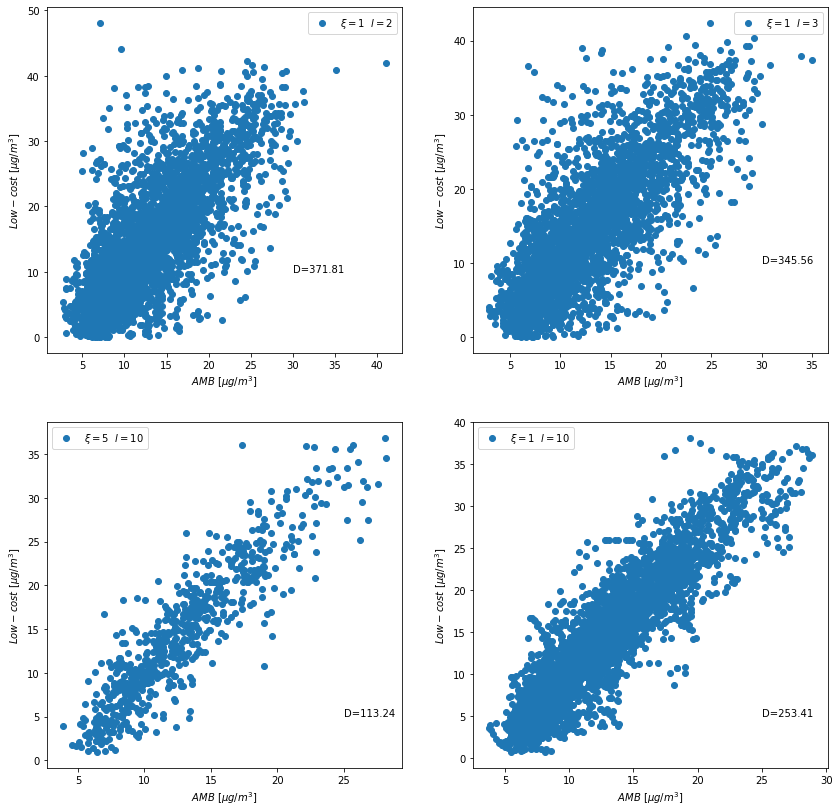

In [152]:
plt.figure(figsize=(14,14))
plt.subplot(221)
D, Promedio = fun(1,2)
Promedio = np.transpose(Promedio)
plt.scatter(Promedio[0],Promedio[1], label=r'$\xi=1 \ \ l=2$')
plt.xlabel(r'$AMB \ [\mu g/m^3]$')
plt.ylabel(r'$Low-cost \ [\mu g/m^3]$')
plt.legend()
plt.text(30,10,'D=%.2f'%(D))
plt.subplot(222)
D, Promedio = fun(1,3)
Promedio = np.transpose(Promedio)
plt.scatter(Promedio[0],Promedio[1], label=r'$\xi=1  \ \ l=3$')
plt.xlabel(r'$AMB \ [\mu g/m^3]$')
plt.ylabel(r'$Low-cost \ [\mu g/m^3]$')
plt.text(30,10,'D=%.2f'%(D))
plt.legend()
plt.subplot(223)
D, Promedio = fun(5,10)
Promedio = np.transpose(Promedio)
plt.scatter(Promedio[0],Promedio[1], label=r'$\xi=5  \ \ l=10$')
plt.xlabel(r'$AMB \ [\mu g/m^3]$')
plt.ylabel(r'$Low-cost \ [\mu g/m^3]$')
plt.text(25,5,'D=%.2f'%(D))
plt.legend()
plt.subplot(224)
D, Promedio = fun(1,10)
Promedio = np.transpose(Promedio)
plt.scatter(Promedio[0],Promedio[1], label=r'$\xi=1  \ \ l=10$')
plt.xlabel(r'$AMB \ [\mu g/m^3]$')
plt.ylabel(r'$Low-cost \ [\mu g/m^3]$')
plt.text(25,5,'D=%.2f'%(D))
plt.legend()

C:\Users\USUARIO\AppData\Local\Temp/ipykernel_15932/519825858.py:26: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean1 = float(List1.mean())
C:\Users\USUARIO\AppData\Local\Temp/ipykernel_15932/519825858.py:27: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean2 = float(List2.mean())


20.0 %
40.0 %
59.9 %
79.9 %
99.9 %
Finish!
20.0 %
40.0 %
59.9 %
79.9 %
99.9 %
Finish!
20.0 %
40.0 %
59.9 %
79.9 %
99.9 %
Finish!
20.0 %
40.0 %
59.9 %
79.9 %
99.9 %
Finish!


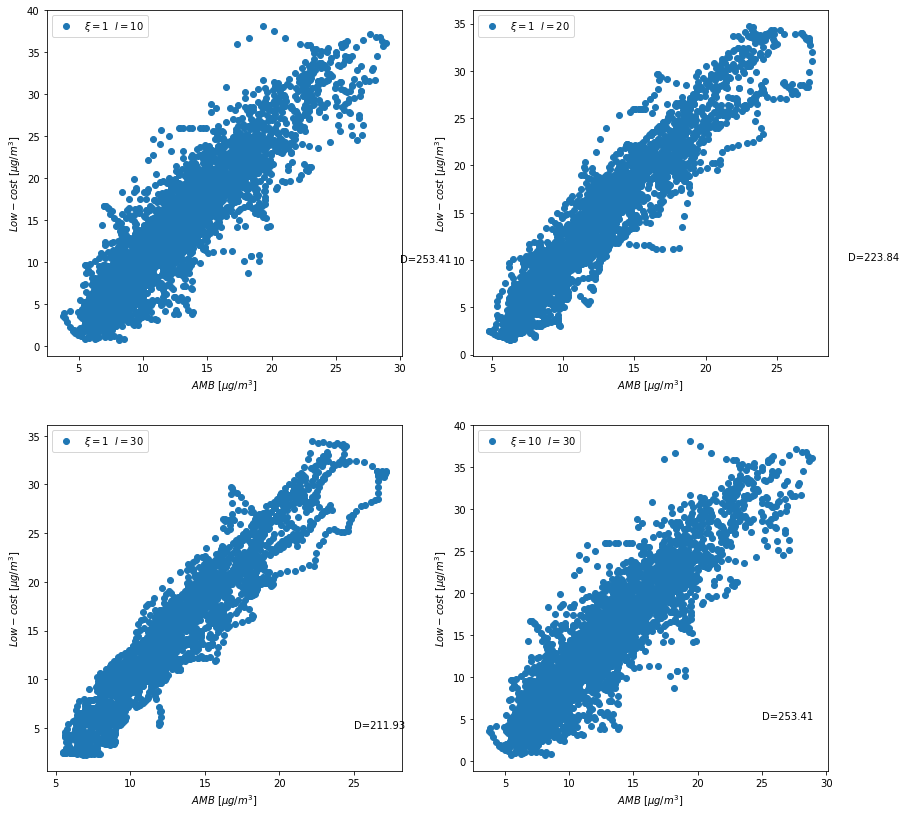

In [153]:
plt.figure(figsize=(14,14))
plt.subplot(221)
D, Promedio = fun(1,10)
Promedio = np.transpose(Promedio)
plt.scatter(Promedio[0],Promedio[1], label=r'$\xi=1 \ \ l=10 \ \$ [$hours$]')
plt.xlabel(r'$AMB \ [\mu g/m^3]$')
plt.ylabel(r'$Low-cost \ [\mu g/m^3]$')
plt.legend()
plt.text(30,10,'D=%.2f'%(D))
plt.subplot(222)
D, Promedio = fun(1,20)
Promedio = np.transpose(Promedio)
plt.scatter(Promedio[0],Promedio[1], label=r'$\xi=1  \ \ l=20  \ \$ [$hours$]')
plt.xlabel(r'$AMB \ [\mu g/m^3]$')
plt.ylabel(r'$Low-cost \ [\mu g/m^3]$')
plt.text(30,10,'D=%.2f'%(D))
plt.legend()
plt.subplot(223)
D, Promedio = fun(1,30)
Promedio = np.transpose(Promedio)
plt.scatter(Promedio[0],Promedio[1], label=r'$\xi=1  \ \ l=30 \ \$ [$hours$]')
plt.xlabel(r'$AMB \ [\mu g/m^3]$')
plt.ylabel(r'$Low-cost \ [\mu g/m^3]$')
plt.text(25,5,'D=%.2f'%(D))
plt.legend()
plt.subplot(224)
D, Promedio = fun(1,10)
Promedio = np.transpose(Promedio)
plt.scatter(Promedio[0],Promedio[1], label=r'$\xi=10  \ \ l=30 \ \$ [$hours$]')
plt.xlabel(r'$AMB \ [\mu g/m^3]$')
plt.ylabel(r'$Low-cost \ [\mu g/m^3]$')
plt.text(25,5,'D=%.2f'%(D))
plt.legend()